<b>Question 1<b>

a) Linear regression is a line to predict the output of the data, from the given data set, between multiple variables
   The equation is Y= a + bX, Y is the dependent variable, X is the independent variable, b is the slope and a is the y-intercept

b) The loss function is the measure of how good the prediction is, ...

R2 shows how well the data points fit a curve or line. Adjusted R2 also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.
Adjusted R2 will always be less than or equal to R2

Adjusted R2 will be needed if we do not have access to the whole population, only the sample

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

graph = {'x':['6','3','6','9','3','9','6','3','9','6','3','9'],
                    'y':['526','421','581','630','412','560','434','443','590','570','346','672']}

In [2]:
plot = pd.DataFrame(graph)

In [3]:
plot

,x,y
0,6,526
1,3,421
2,6,581
3,9,630
4,3,412
5,9,560
6,6,434
7,3,443
8,9,590
9,6,570


In [4]:
X = [6,3,6,9,3,9,6,3,9,6,3,9]

In [5]:
Y = [526,421,581,630,412,560,434,443,590,570,346,672]

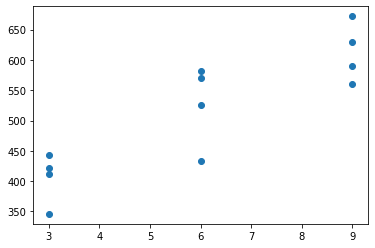

In [6]:
plt.scatter(X,Y)

In [51]:
df = pd.DataFrame({'x':[6,3,6,9,3,9,6,3,9,6,3,9],
                 'y':[526,421,581,630,412,560,434,443,590,570,346,672]})

In [52]:
df.cov()
#The X and Y are very far apart, as X goes up, Y goes up

,x,y
x,6.545455,226.363636
y,226.363636,10252.265152


In [53]:
df.corr(method = 'pearson')
#different methods of correlation produce different results

,x,y
x,1.00000,0.87383
y,0.87383,1.00000


In [54]:
df.corr(method = 'kendall')
#both both methods of correlation are closely together, sideways down will always be 1 since it is itself, and other numbers are how far it is from itself, the 1

,x,y
x,1.000000,0.746203
y,0.746203,1.000000


In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

plot

,x,y
0,6,526
1,3,421
2,6,581
3,9,630
4,3,412
5,9,560
6,6,434
7,3,443
8,9,590
9,6,570


In [9]:
x = np.array([6,3,6,9,3,9,6,3,9,6,3,9]).reshape((-1,1))
y = np.array([526,421,581,630,412,560,434,443,590,570,346,672])

In [10]:
model = LinearRegression().fit(x,y)

In [11]:
print(x)

[[6]
 [3]
 [6]
 [9]
 [3]
 [9]
 [6]
 [3]
 [9]
 [6]
 [3]
 [9]]


In [12]:
print(y)

[526 421 581 630 412 560 434 443 590 570 346 672]


B0 is the slope and B1 is the intercept, B0 is how many the sale is increasing per week, and B1 is how many sales at the Y intercept, so maybe the preorders

Evaluation:
R squared 
adjusted R squared
RMSE (Root Mean Square Error)
MAE
Confusion Matrix
F1 Score
Gain and Lift charts
Kolomogorov Smirnov chart
Area Under the ROC curve (AUC – ROC)
Log Loss... etc

In [13]:
from sklearn.metrics import r2_score

In [14]:
RSquared = r2_score(y, x)

In [15]:
print(RSquared)

-27.56957109995648


In [16]:
n = 12
p = 0

In [17]:
ARS = (1-(1-RSquared))*((n-1)/(n-p-1))

In [18]:
#adjusted R squared
ARS

-27.56957109995648

In [19]:
from statsmodels.formula.api import ols

In [20]:
from statsmodels.stats.anova import anova_lm

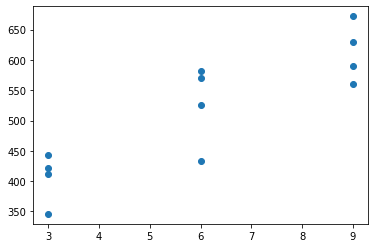

In [21]:
plt.plot(X,Y,'o')

In [22]:
data = pd.DataFrame({'x': X, 'y': Y})

In [23]:
data

,x,y
0,6,526
1,3,421
2,6,581
3,9,630
4,3,412
5,9,560
6,6,434
7,3,443
8,9,590
9,6,570


In [24]:
model = ols("y~x", data).fit()

In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     32.30
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           0.000203
Time:                        21:27:52   Log-Likelihood:                -63.264
No. Observations:                  12   AIC:                             130.5
Df Residuals:                      10   BIC:                             131.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    307.9167     39.437      7.808      0.0

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [26]:
ResultsAnova = anova_lm(model)

In [27]:
print(ResultsAnova)
#Anova gave the summary of OLS Regression Results
#The higher the week the higher the sells

            df        sum_sq       mean_sq          F    PR(>F)
x          1.0  86112.500000  86112.500000  32.297335  0.000203
Residual  10.0  26662.416667   2666.241667        NaN       NaN


<function matplotlib.pyplot.show(*args, **kw)>

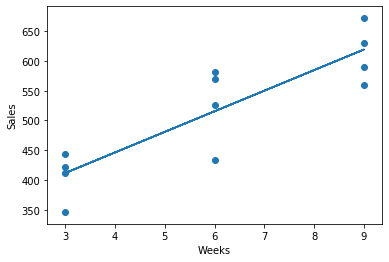

In [28]:
offset, coef = model._results.params
plt.plot(x,x*coef+offset)
plt.scatter(X,Y)
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.show
#Linear regression line

In [29]:
newModel = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', newModel.intercept_)
#intercept

intercept: [307.91666667]


In [30]:
print('slope:', newModel.coef_)
#slope

slope: [[34.58333333]]


Question 2

Conditional probability: The probability of a event A occuring given another event B, ex. The probability of the sky is sunny (event A) given it is raining outside (event B) (P(A|B))/P(A)

Marginal probabilty: The probability of a event occuring, ex. The probability of drawing a red card out of a deck of equal numbers of red and blue cards is 0.5 or P(A) = 0.5

Joint probability: The probability of 2 or more events occuring, ex. The probability of the sky is sunny and the sky is rainning happening P(A and B) = P(A) * P(B)...

Baye's rule: describes the probability of the event, based on previous knowledge of conditions that might have been related to the event

Formula: (P(B|A)P(A))/P(B)
P(A) is the prior, P(B|A)P(A) is the posterior, given P(B|A) what is the probability of P(A) occuring, P(B|A) is the likelihood, P(B) is the marginal probability

naïve Bayes is a simple "probabilistic classifier" based on Bayes' theorem with (naive) assumptions between the given events


In [31]:
nb = pd.read_csv('HW2Data.csv')

In [32]:
nb

,Example No.,Color,Type,Origin,Stolen?
0,1,Red,Sports,Domestic,Yes
1,2,Red,Sports,Domestic,No
2,3,Red,Sports,Domestic,Yes
3,4,Yellow,Sports,Domestic,No
4,5,Yellow,Sports,Imported,Yes
5,6,Yellow,SUV,Imported,No
6,7,Yellow,SUV,Imported,Yes
7,8,Yellow,SUV,Domestic,No
8,9,Red,SUV,Imported,No
9,10,Red,Sports,Imported,Yes


In [33]:
Color = nb['Color']

In [34]:
Type = nb['Type']

In [35]:
Origin = nb['Origin']

In [36]:
Stolen = nb['Stolen?']

In [37]:
Stolen.value_counts()

Yes    5
No     5
Name: Stolen?, dtype: int64

In [38]:
#yes is 5/10 and no is 5/10
#P(Red|SUV|Domestic)
#P(Red|Yes) = 3/5     #P(Red|No) = 2/5
#P(SUV|Yes) = 1/5     #P(SUV|No) = 3/5
#P(Domestic|Yes) = 2/5     #P(Domestic|No) = 3/5
#P(Red|SUV|Domestic|Yes) =  1/2*3/5*1/5*2/5    #P(Red|SUV|Domestic|No) = 1/2*2/5*3/5*3/5
Color.value_counts()

Yellow    5
Red       5
Name: Color, dtype: int64

In [39]:
#Red is 5/10
Type.value_counts()

Sports    6
SUV       4
Name: Type, dtype: int64

In [40]:
#SUV is 4/10
Origin.value_counts()

Imported    5
Domestic    5
Name: Origin, dtype: int64

In [41]:
#Domestic is 5/10
YES = (1/2)*(3/5)*(1/5)*(2/5)
YES

0.024

In [42]:
NO = (1/2)*(2/5)*(3/5)*(3/5)
NO

0.072

In [43]:
P = (5/10)*(4/10)*(5/10)
P

0.1

In [44]:
PYes = YES/P
PYes

0.24

In [45]:
PNo = NO/P
PNo

0.7199999999999999

In [46]:
#So the probability that a red domestic suv will be stolen is 0.24, and it wont be stolen is around 0.72
#The red domestic suv will probabilily not be stolen